<a href="https://colab.research.google.com/github/suminyeom/project_Lovely-G.4_none/blob/main/%5B%EC%88%98%EB%AF%BC%5D%EB%AF%B8%EB%9E%98%EB%A7%A4%EC%B6%9C%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

train=pd.read_csv("/content/drive/MyDrive/competitive-data-science-predict-future-sales/sales_train.csv")
test=pd.read_csv("/content/drive/MyDrive/competitive-data-science-predict-future-sales/test.csv")
submission=pd.read_csv("/content/drive/MyDrive/competitive-data-science-predict-future-sales/sample_submission.csv")
items=pd.read_csv("/content/drive/MyDrive/competitive-data-science-predict-future-sales/items.csv")
cats=pd.read_csv("/content/drive/MyDrive/competitive-data-science-predict-future-sales/item_categories.csv")
shops=pd.read_csv("/content/drive/MyDrive/competitive-data-science-predict-future-sales/shops.csv")

# EDA

In [101]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


train 데이터셋
* date  - dd/mm/yyyy 형식의 날짜
* date_block_num - 편의를 위해 사용되는 연속된 월 번호
* shop_id - 상점의 고유 식별자
* item_id - 상품의 고유 식별자
* item_price - 상품의 현재 가격
* item_cnt_day - 상품 판매량

(2935849, 6)

In [102]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


test 데이터셋
* ID  - 테스트 세트 내의 (상점, 상품) 튜플을 나타내는 ID
* shop_id - 상점의 고유 식별자
* item_id - 상품의 고유 식별자

(214200,3)

In [103]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


items 데이터셋
* item_name  - 상품 이름
* item_id - 상품의 고유 식별자
* item_category_id - 품목 카테고리의 고유 식별자

(22170, 3)

In [104]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


shops 데이터셋
* shop_name - 상점 이름
* shop_id - 상점의 고유 식별자

(60, 2)

In [105]:
cats

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


cats
* item_category_name - 품목 카테고리의 이름
* item_category_id - 품목 카테고리의 고유 식별자

(84, 2)

In [106]:
submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


submission
* ID  - 테스트 세트 내의 (상점, 상품) 튜플을 나타내는 ID
* item_cnt_day - 상품판매량

(214200, 2)



---


* shop_name에서 첫 단어는 상점이 위치한 도시를 나타냄-> 추후 파생변수 생성 고려

* item_category_name에서 첫 글자는 대분류를 의미-> 추후 파생변수 생성 고려



##  결측치

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [108]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [110]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

* train, test 모두 결측치 없음

##  이상치

<ipython-input-111-a859660d992e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column],palette='rainbow')


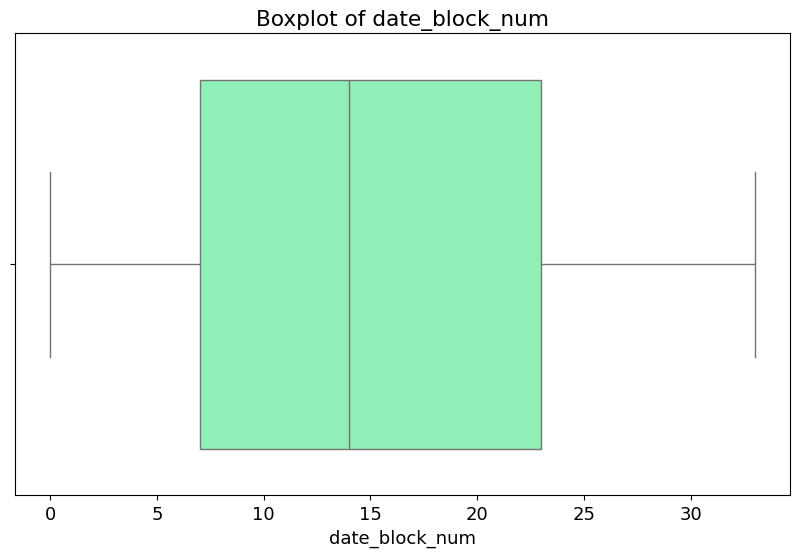

<ipython-input-111-a859660d992e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column],palette='rainbow')


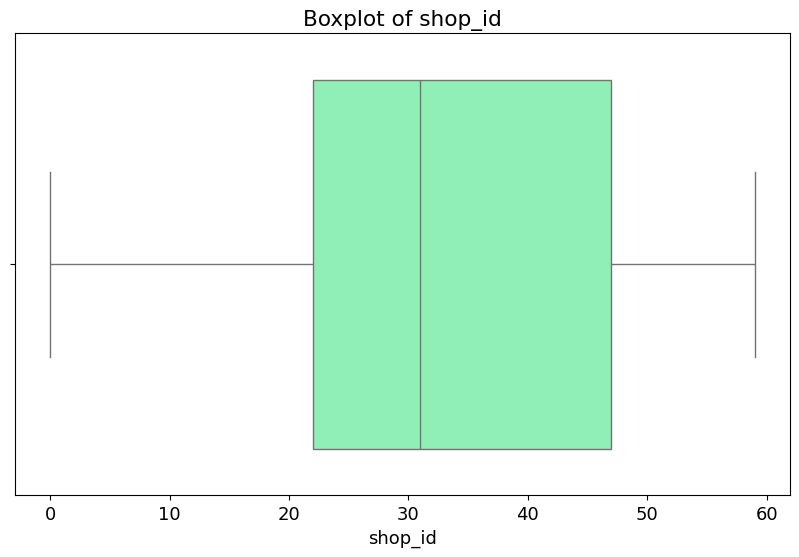

<ipython-input-111-a859660d992e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column],palette='rainbow')


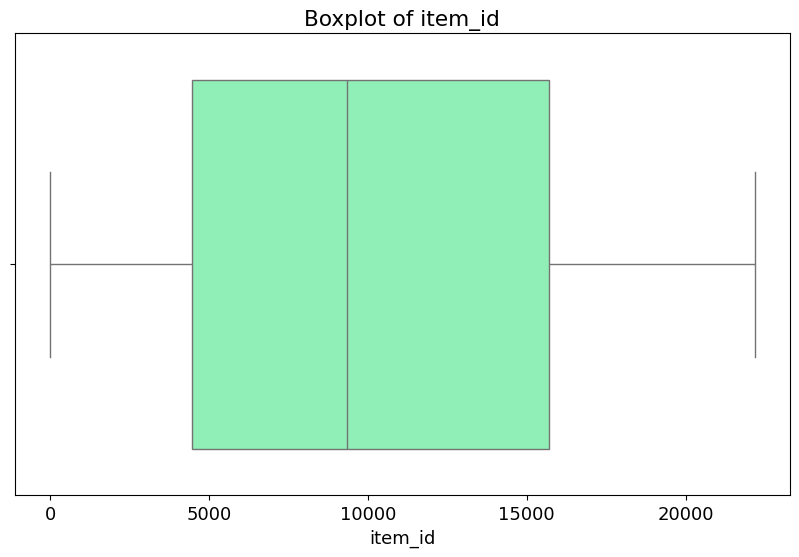

<ipython-input-111-a859660d992e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column],palette='rainbow')


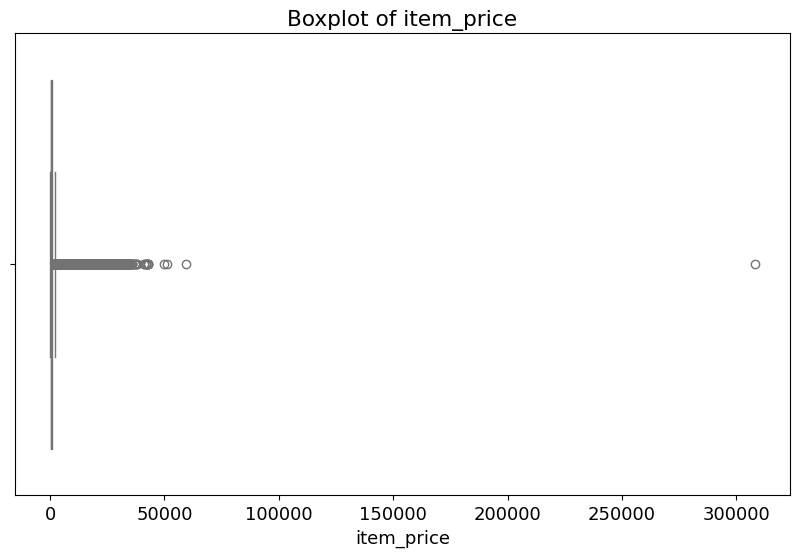

<ipython-input-111-a859660d992e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column],palette='rainbow')


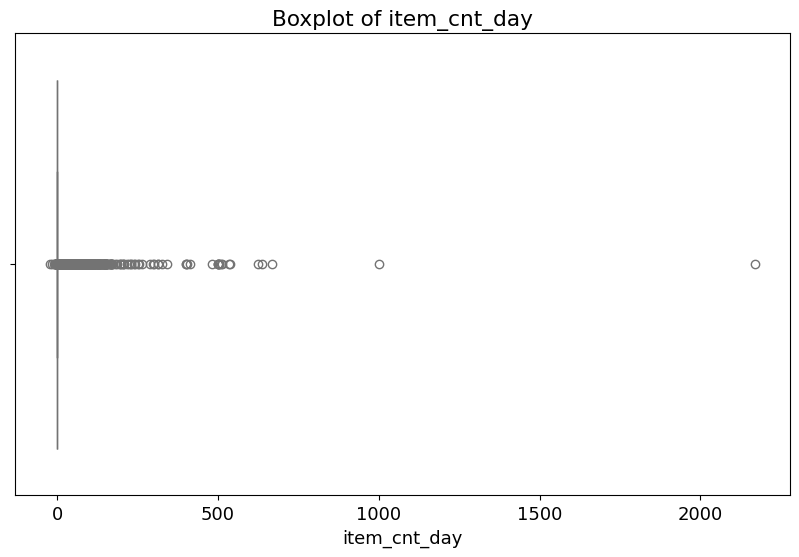

In [111]:
# date를 제외한 모든 train 변수들의 이상치 확인 박스플롯

# Filter numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

* item_price, item_cnt_day 컬럼에서 이상치 발견

In [112]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1001]

* item_price와 item_cnt_day 컬럼 둘 다 극이상치인 한 가지 값만 제거
* item_cnt_day에서 값이 1000인 경우는 제거할지 말지 고민

In [113]:
train[train['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


* item_price의 값이 음수인 경우 발견

In [114]:
median = train[(train.shop_id==32)&(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)].item_price.median()
train.loc[train.item_price<0, 'item_price'] = median

* 다른 변수들의 값이 해당 행과 같으면서 item_price가 양수인 행들의 중앙값을 계산해서 대체

## 중복된 행

In [115]:
train[train.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


* 6쌍의 중복된 행 존재

In [116]:
train.drop_duplicates(inplace=True)

In [117]:
train.shape

(2935841, 6)

* 6개의 중복된 행 제거

In [118]:
print(shops.iloc[0], '\n')
print(shops.iloc[57], '\n')
print('-------------------------------------------------------------------')

print(shops.iloc[1], '\n')
print(shops.iloc[58], '\n')
print('-------------------------------------------------------------------')

print(shops.iloc[10], '\n')
print(shops.iloc[11], '\n')
print('-------------------------------------------------------------------')

print(shops.iloc[39], '\n')
print(shops.iloc[40], '\n')

shop_name    !Якутск Орджоникидзе, 56 фран
shop_id                                  0
Name: 0, dtype: object 

shop_name    Якутск Орджоникидзе, 56
shop_id                           57
Name: 57, dtype: object 

-------------------------------------------------------------------
shop_name    !Якутск ТЦ "Центральный" фран
shop_id                                  1
Name: 1, dtype: object 

shop_name    Якутск ТЦ "Центральный"
shop_id                           58
Name: 58, dtype: object 

-------------------------------------------------------------------
shop_name    Жуковский ул. Чкалова 39м?
shop_id                              10
Name: 10, dtype: object 

shop_name    Жуковский ул. Чкалова 39м²
shop_id                              11
Name: 11, dtype: object 

-------------------------------------------------------------------
shop_name    РостовНаДону ТРК "Мегацентр Горизонт"
shop_id                                         39
Name: 39, dtype: object 

shop_name    РостовНаДону ТРК "Мег

* 상점 이름(shop_name)이 중복되는 경우 발견(shop_id는 다름)
* (0행-57행), (1행-58행), (10행-11행), (39행-40행) -> 4쌍

In [119]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11
#РостовНаДону ТРК "Мегацентр Горизонт"
train.loc[train.shop_id == 39, 'shop_id'] = 40
test.loc[test.shop_id == 39, 'shop_id'] = 40

* 서로 다른 shop_id를 하나로 통일

## 시각화

In [120]:
train = train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')

In [121]:
train = train.merge(cats, on='item_category_id', how='left')

In [122]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


* 주어진 데이터셋을 train 데이터에 전부 병합한 상태로 진행

### 상품 판매량(타겟변수) 분포

In [123]:
from collections import Counter

counter = Counter(train['item_cnt_day'])

for value, count in counter.most_common():
    print(f"{value}: {count} 개")

1.0: 2629365 개
2.0: 194201 개
3.0: 47350 개
4.0: 19685 개
5.0: 10474 개
-1.0: 7252 개
6.0: 6338 개
7.0: 4057 개
8.0: 2903 개
9.0: 2177 개
10.0: 1820 개
11.0: 1263 개
12.0: 1083 개
13.0: 918 개
14.0: 716 개
15.0: 638 개
16.0: 544 개
17.0: 438 개
18.0: 391 개
20.0: 364 개
19.0: 347 개
21.0: 290 개
22.0: 242 개
24.0: 204 개
23.0: 198 개
25.0: 180 개
26.0: 176 개
30.0: 147 개
28.0: 131 개
27.0: 130 개
31.0: 123 개
32.0: 106 개
29.0: 102 개
33.0: 82 개
34.0: 81 개
-2.0: 78 개
35.0: 69 개
36.0: 62 개
37.0: 61 개
40.0: 58 개
41.0: 58 개
38.0: 54 개
39.0: 52 개
44.0: 40 개
46.0: 39 개
42.0: 36 개
43.0: 34 개
50.0: 33 개
45.0: 31 개
47.0: 25 개
49.0: 25 개
52.0: 22 개
48.0: 22 개
51.0: 21 개
55.0: 20 개
61.0: 18 개
-3.0: 14 개
53.0: 14 개
60.0: 14 개
62.0: 14 개
64.0: 13 개
100.0: 13 개
54.0: 13 개
59.0: 13 개
56.0: 12 개
57.0: 12 개
80.0: 12 개
67.0: 12 개
65.0: 10 개
72.0: 10 개
58.0: 9 개
63.0: 9 개
82.0: 8 개
84.0: 8 개
87.0: 8 개
69.0: 7 개
70.0: 6 개
71.0: 6 개
110.0: 6 개
78.0: 6 개
98.0: 6 개
81.0: 6 개
151.0: 5 개
97.0: 5 개
73.0: 5 개
-5.0: 4 개
77.0: 4 개
89.0: 4 개
10

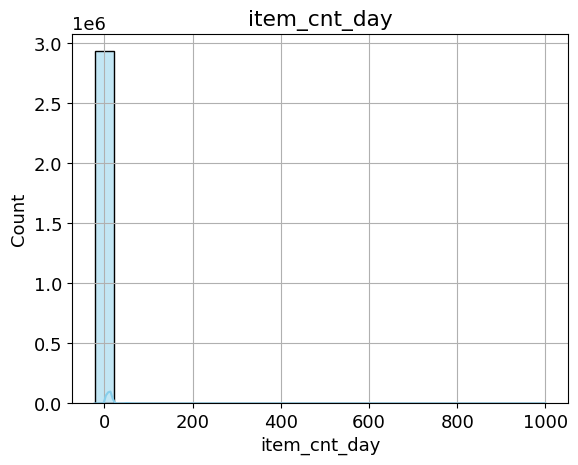

In [124]:
#타겟 변수(item_cnt_day) 분포
sns.histplot(x='item_cnt_day', data=train, kde=True, color='skyblue')
plt.xlabel('item_cnt_day')
plt.title('item_cnt_day')
plt.grid(True)
plt.show()

* 판매된 제품 수가 1개인 경우가 월등히 많음

### 월별 총 상품 판매량

<ipython-input-125-149f83a11b43>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum, palette='Set3')


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

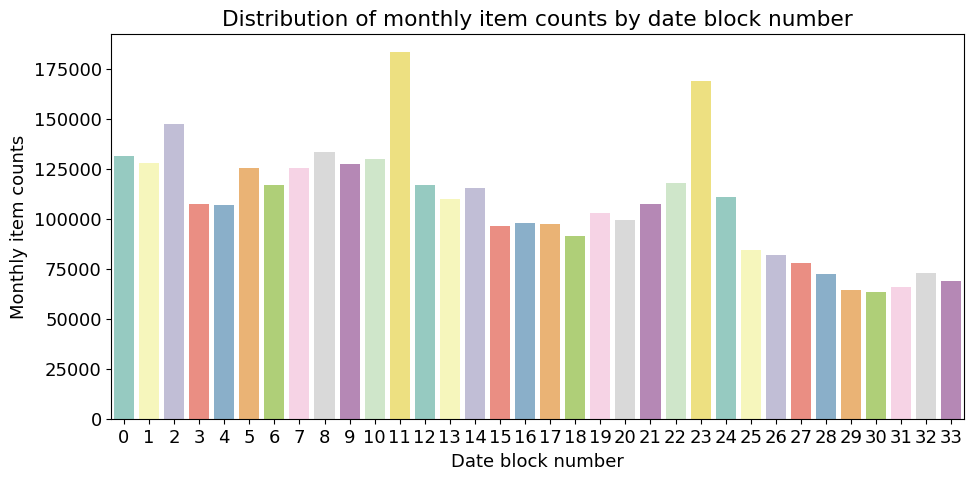

In [125]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

#월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

#그래프 그리기
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum, palette='Set3')

#그래프 제목, x축 라벨, y축 라벨
ax.set(title='Distribution of monthly item counts by date block number',
      xlabel='Date block number',
      ylabel='Monthly item counts')

date_block_num 피처를 기준으로 그룹화하여 월별 판매량 확인(월별 판매량을 예측하는 것이 목표기 때문에 date 대신 date_block_num을 이용)
* date_block_num이 11, 23일 때 판매량이 가장 많음 -> 12월에 판매량이 가장 많음
* 시간이 갈수록 전반적으로 판매량이 줄어듦

### 상품분류별 총 상품 판매량

<ipython-input-126-6e6edd587319>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum, palette='Set3')


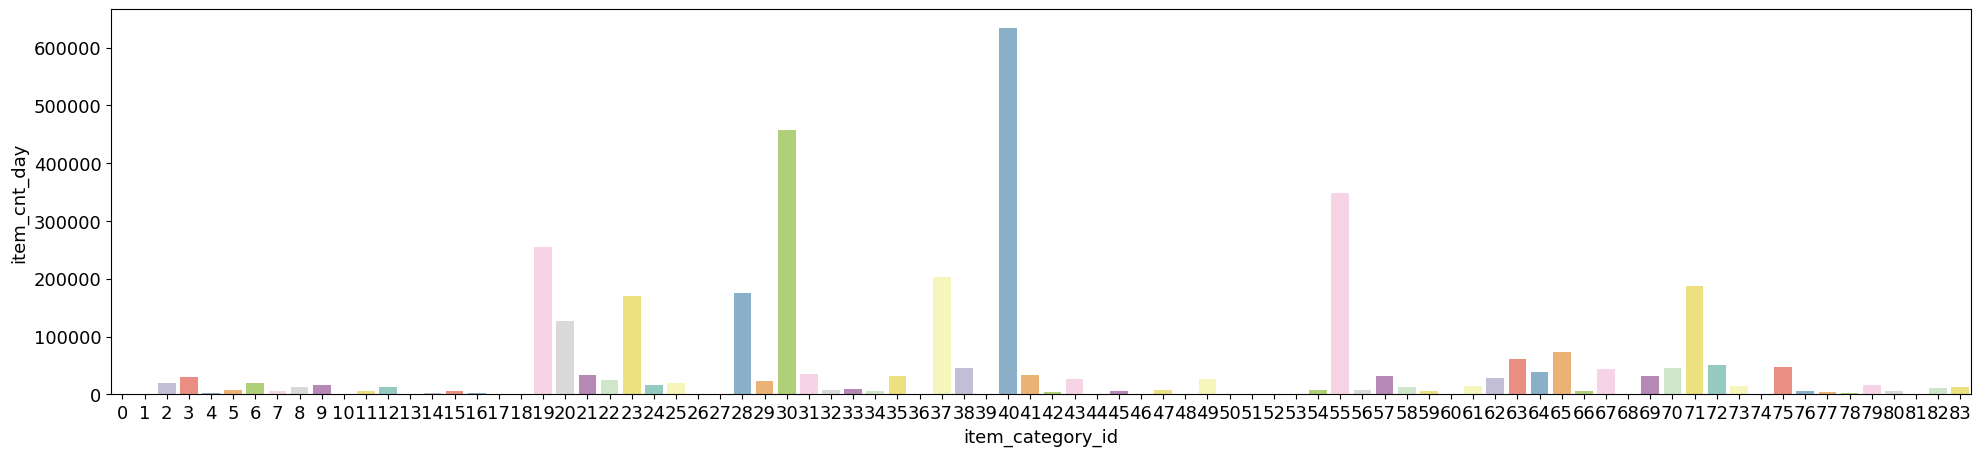

In [126]:
figure, zs = plt.subplots()
figure.set_size_inches(24, 5)

#상품분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum, palette='Set3')
ax.set(title='Distribution of total item counts by item category id',
      xlabel='Date block number',
      ylabel='Total item counts')

ax.tick_params(axis='x', labelrotation=90) #x축 라벨 회전

item_category_id 피처를 기준으로 그룹화하여 상품분류별 판매량 확인(item_id는 고유값이 매우 많으므로 카테고리화한 item_category_id 이용)
* item_category_id가 40, 30, 55, 19일 때 판매량이 많음
* 몇몇 범주의 상품들이 비교적 많이 팔림

### 상점별 총 상품 판매량

<ipython-input-127-f3fcd4ae78a2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shop_id', y='item_cnt_day', data=group_cat_sum, palette='Set3')


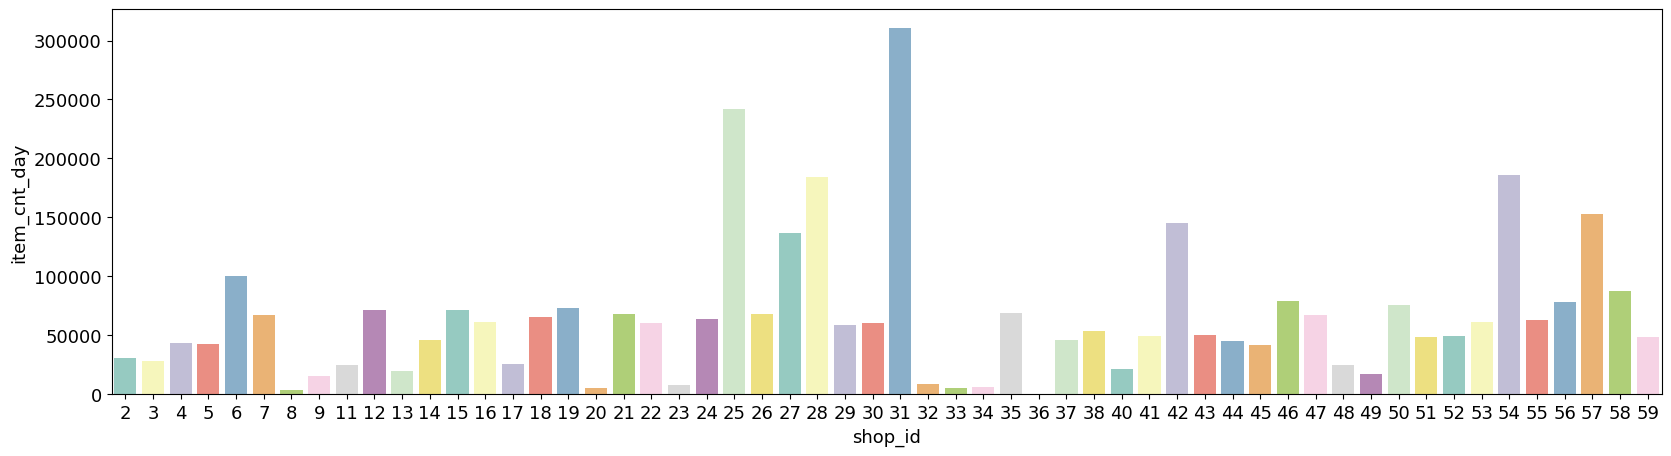

In [127]:
figure, zs = plt.subplots()
figure.set_size_inches(20, 5)

#상점별 총 상품 판매량
group_cat_sum = train.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

sns.barplot(x='shop_id', y='item_cnt_day', data=group_cat_sum, palette='Set3')
ax.set(title='Distribution of total item counts by shop id',
      xlabel='Date block number',
      ylabel='Total item counts')

ax.tick_params(axis='x', labelrotation=90) #x축 라벨 회전

shop_id 피처를 기준으로 그룹화하여 상점별 판매량 확인
* shop_id가 31일 때 판매량이 가장 많음
* 몇몇 상점들이 비교적 많은 판매량을 보임

### 월별 상품가격추이

<ipython-input-128-950c6a9a133c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_block_num', y='item_price', data=group_month_sum, palette='Set3')


[Text(0.5, 1.0, 'Distribution of monthly item price by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item price')]

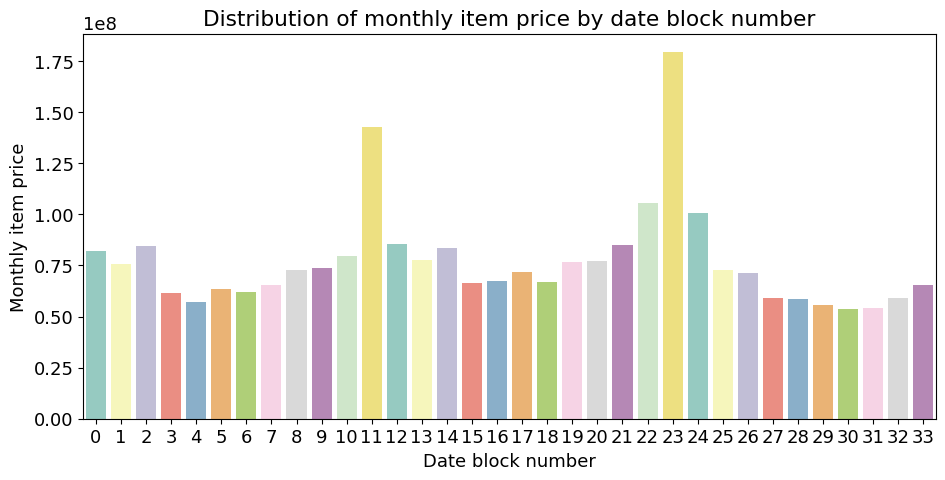

In [128]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

#월별 상품가격추이
group_month_sum = train.groupby('date_block_num').agg({'item_price':'sum'})
group_month_sum = group_month_sum.reset_index()

#그래프 그리기
sns.barplot(x='date_block_num', y='item_price', data=group_month_sum, palette='Set3')

#그래프 제목, x축 라벨, y축 라벨
ax.set(title='Distribution of monthly item price by date block number',
      xlabel='Date block number',
      ylabel='Monthly item price')

date_block_num 피처를 기준으로 그룹화하여 월별 상품가격추이 확인
* date_block_num이 11, 23일 때 가격이 가장 높아짐 -> 12월에 상품 가격이 제일 비쌈
* 그 외에는 전반적으로 큰 변화가 없음

### 상품가격별 판매량

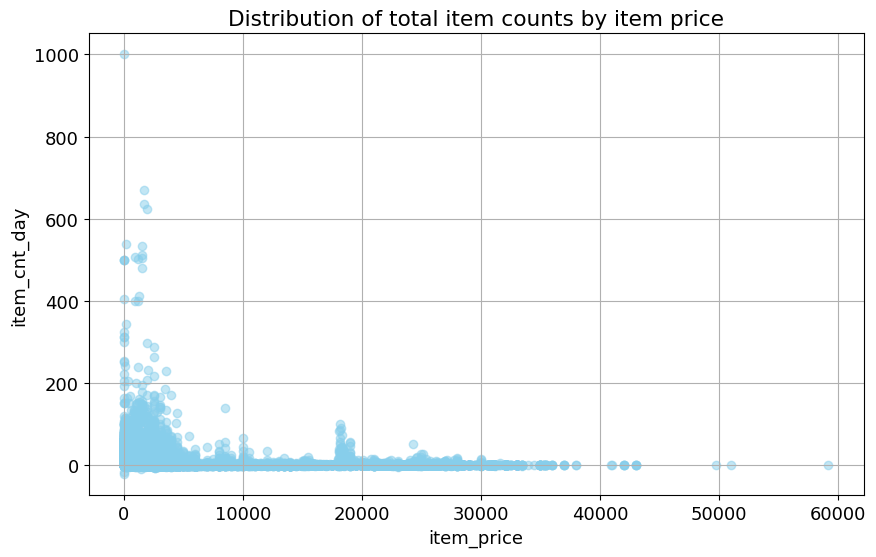

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(train['item_price'], train['item_cnt_day'], alpha=0.5, color='skyblue')
plt.title('Distribution of total item counts by item price')
plt.xlabel('item_price')
plt.ylabel('item_cnt_day')
plt.grid(True)
plt.show()

* 상품 가격이 비쌀수록 전체적으로 판매량이 줄어듦